# Diagnosing the Model

Evaluate the accuracy and health of the logistic regression model by creating a confusion matrix and classification report to describe its performance.

In [1]:
from path import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

## Create, train, and execute the LR model

In [2]:
# Prep the data
data = Path('../Resources/diabetes.csv')
df = pd.read_csv(data)

y = df["Outcome"]
X = df.drop(columns="Outcome")

# Split data into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                    stratify=y)

# Create and train LR model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier.fit(X_train, y_train)

# Make LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


## Confusion Matrix

In [3]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[113,  12],
       [ 31,  36]], dtype=int64)

## Classification Report

In [4]:
# Create a classification report
target_names = ["No Diabetes", "Diabetes"]

# YOUR CODE HERE
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.78      0.90      0.84       125
    Diabetes       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



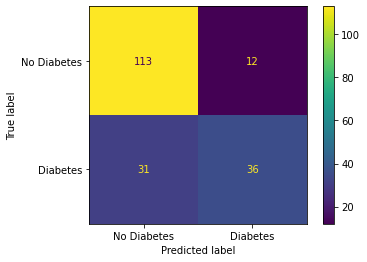

In [5]:
cm = confusion_matrix(y_test, predictions)

from sklearn.metrics import ConfusionMatrixDisplay

disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= target_names)
disp.plot()